# Data Analysis

## Getting Input Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

trainingLink = "https://raw.githubusercontent.com/LuisM78/Occupancy-detection-data/master/datatraining.txt"
dataTest1Link = "https://raw.githubusercontent.com/LuisM78/Occupancy-detection-data/master/datatest.txt"
dataTest2Link = "https://raw.githubusercontent.com/LuisM78/Occupancy-detection-data/master/datatest2.txt"

# ---- Variables: ----
# tr = training set
# ts1 = test set 1
# ts2 = test set 2
# trainX = training set input values
# trainy = training set target values
# test1X = test set 1 input values
# test1y = test set 1 target values
# test2X = test set 2 input values
# test2y = test set 2 target values


# getting training set
tr = pd.read_csv(trainingLink, sep=",", skiprows=1, header=None)
tr.columns = ["Id","date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
tr = tr.drop(columns=['Id'])
# convert date string to datetime
tr['date'] =  pd.to_datetime(tr['date'], format='%Y-%m-%d %H:%M:%S')
# split day and time and drop date column
dates, times = zip(*[(d.date(), d.time()) for d in tr['date']])
tr.insert(0, 'Day', dates)
tr.insert(1, 'Time', times)
tr = tr.drop(columns=['date'])
# splitting training set
target = tr[tr.columns[-1:]]
target.columns = ["Occupancy"]
trainX = tr[tr.columns[:-1]]
trainy = target


# getting test set 1
ts1 = pd.read_csv(dataTest1Link, sep=",", skiprows=1, header=None)
ts1.columns = ["Id","date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
ts1 = ts1.drop(columns=['Id'])
# convert date string to datetime
ts1['date'] =  pd.to_datetime(ts1['date'], format='%Y-%m-%d %H:%M:%S')
# split day and time and drop date column
dates, times = zip(*[(d.date(), d.time()) for d in ts1['date']])
ts1.insert(0, 'Day', dates)
ts1.insert(1, 'Time', times)
ts1 = ts1.drop(columns=['date'])
# splitting training set
target = ts1[ts1.columns[-1:]]
target.columns = ["Occupancy"]
test1X = ts1[ts1.columns[:-1]]
test1y = target


# getting test set 2
ts2 = pd.read_csv(dataTest2Link, sep=",", skiprows=1, header=None)
ts2.columns = ["Id","date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
ts2 = ts2.drop(columns=['Id'])
# convert date string to datetime
ts2['date'] =  pd.to_datetime(ts2['date'], format='%Y-%m-%d %H:%M:%S')
# split day and time and drop date column
dates, times = zip(*[(d.date(), d.time()) for d in ts2['date']])
ts2.insert(0, 'Day', dates)
ts2.insert(1, 'Time', times)
ts2 = ts2.drop(columns=['date'])
# splitting training set
target = ts2[ts2.columns[-1:]]
target.columns = ["Occupancy"]
test2X = ts2[ts2.columns[:-1]]
test2y = target


In [ ]:
print("Training set:")
print('X: ({},{})'.format(trainX.shape[0], trainX.shape[1]))
print('y: ({},{})'.format(trainy.shape[0], trainy.shape[1]))
print("Test set 1:")
print('X: ({},{})'.format(test1X.shape[0], test1X.shape[1]))
print('y: ({},{})'.format(test1y.shape[0], test1y.shape[1]))
print("Test set 2:")
print('X: ({},{})'.format(test2X.shape[0], test2X.shape[1]))
print('y: ({},{})'.format(test2y.shape[0], test2y.shape[1]))


Training set:
X: (8143,7)
y: (8143,1)
Test set 1:
X: (2665,7)
y: (2665,1)
Test set 2:
X: (9752,7)
y: (9752,1)


## Distribution of the variables and statistics 

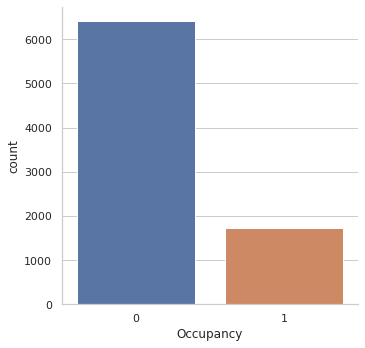

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
sns.catplot(x="Occupancy", kind="count", data=tr);

In [ ]:
# Determino num bins con la regola di Sturges
import math

k = math.ceil(1 + ((10/3)*math.log10(8143)))
print(k)

15


Histograms (separate)

In [ ]:
import matplotlib.pyplot as plt
import collections
import numpy as np

([<matplotlib.axis.YTick at 0x7ff06f29f780>,
 <a list of 15 Text major ticklabel objects>)

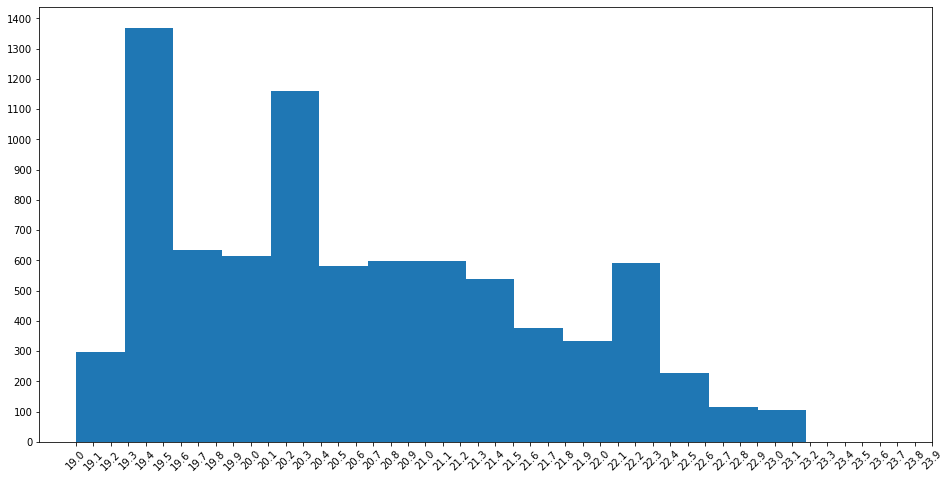

In [ ]:
plt.figure(figsize=(16,8))
plt.hist(tr.Temperature, bins=15)
plt.xticks(np.arange(math.floor(min(tr.Temperature)), math.ceil(max(tr.Temperature)), step=0.1), rotation=45)
plt.yticks(np.arange(0, 1500, step=100))

([<matplotlib.axis.YTick at 0x7ff06ec37d68>,
 <a list of 15 Text major ticklabel objects>)

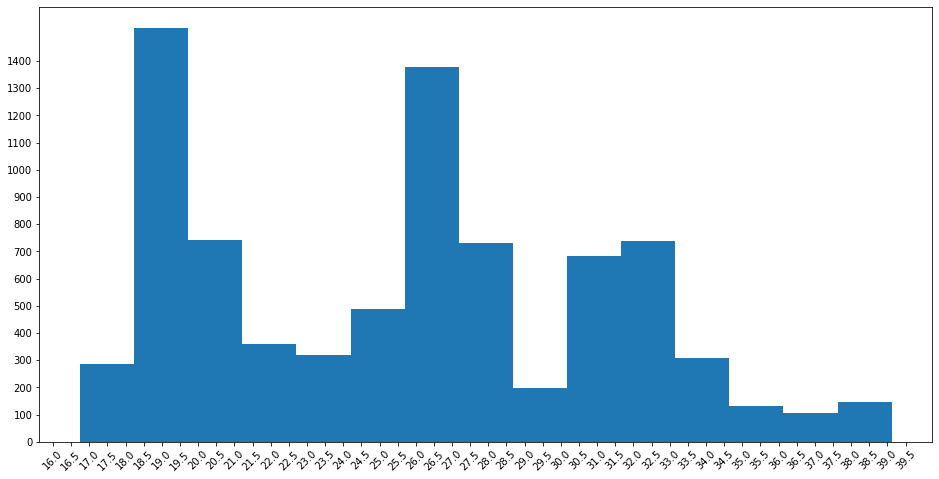

In [ ]:
plt.figure(figsize=(16,8))
plt.hist(tr.Humidity, bins=15)
plt.xticks(np.arange(math.floor(min(tr.Humidity)), math.ceil(max(tr.Humidity)), step=0.5), rotation=45)
plt.yticks(np.arange(0, 1500, step=100))

([<matplotlib.axis.YTick at 0x7ff06eabe320>,
 <a list of 24 Text major ticklabel objects>)

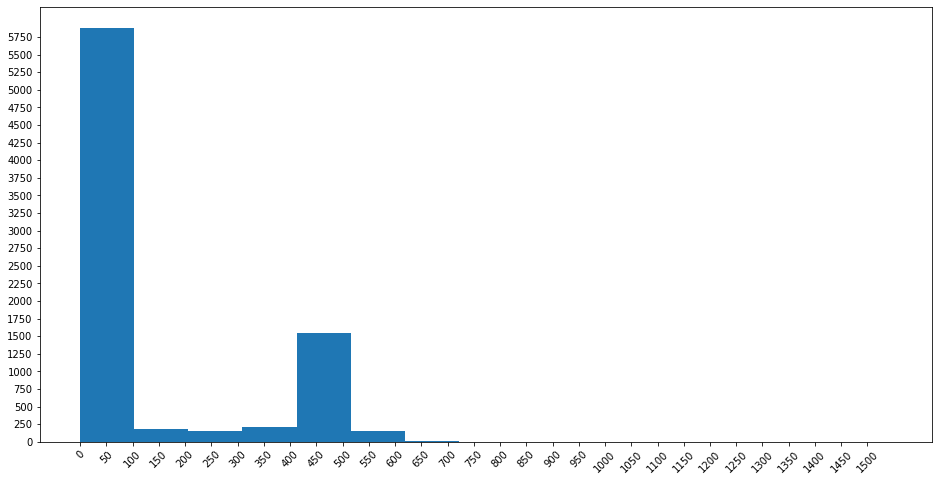

In [ ]:
plt.figure(figsize=(16,8))
plt.hist(tr.Light, bins=15)
plt.xticks(np.arange(min(tr.Light), math.ceil(max(tr.Light)), step=50), rotation=45)
plt.yticks(np.arange(0, 6000, step=250))

([<matplotlib.axis.YTick at 0x7ff06ec09278>,
 <a list of 15 Text major ticklabel objects>)

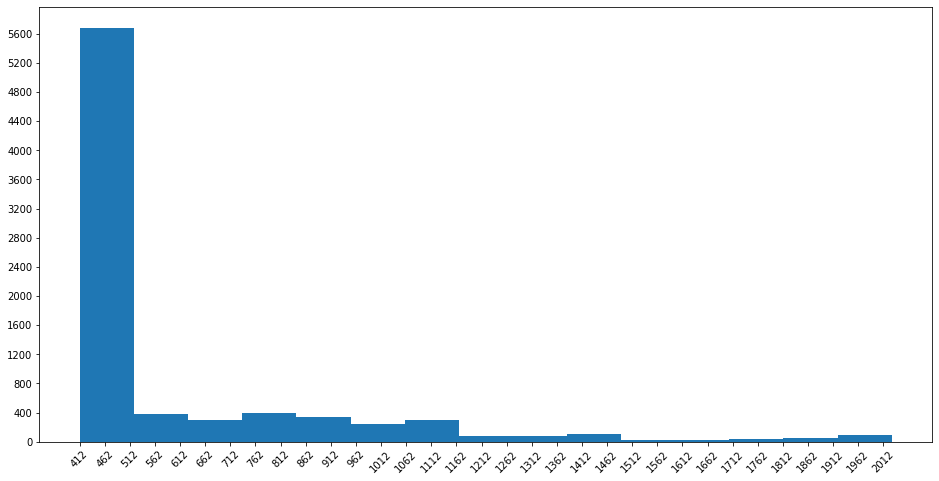

In [ ]:
plt.figure(figsize=(16,8))
plt.hist(tr.CO2, bins=15)
plt.xticks(np.arange(math.floor(min(tr.CO2)), math.ceil(max(tr.CO2)), step=50), rotation=45)
plt.yticks(np.arange(0, 6000, step=400))

([<matplotlib.axis.YTick at 0x7ff06e9516a0>,
 <a list of 16 Text major ticklabel objects>)

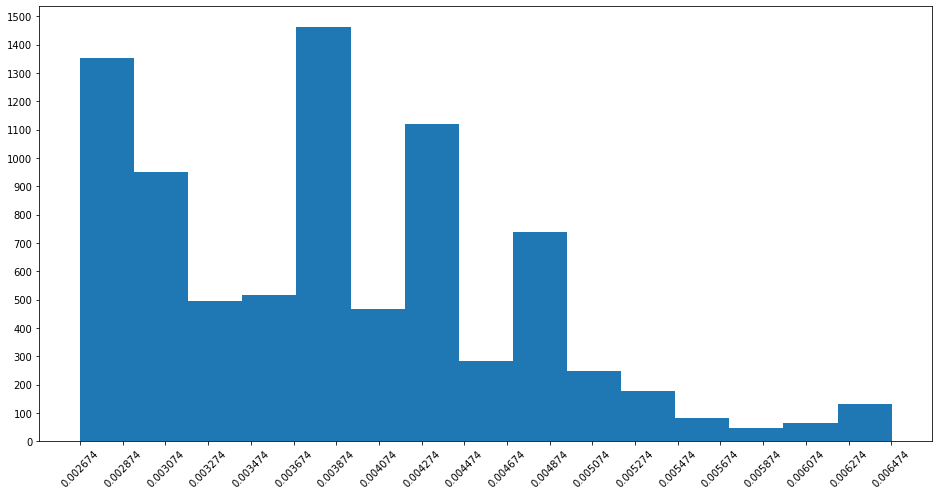

In [ ]:
plt.figure(figsize=(16,8))
plt.hist(tr.HumidityRatio, bins=15)
plt.xticks(np.arange(min(tr.HumidityRatio), max(tr.HumidityRatio), step =0.0002), rotation=45)
plt.yticks(np.arange(0, 1550, step=100))

### Histograms (small), Density, Box & Scatter plots

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

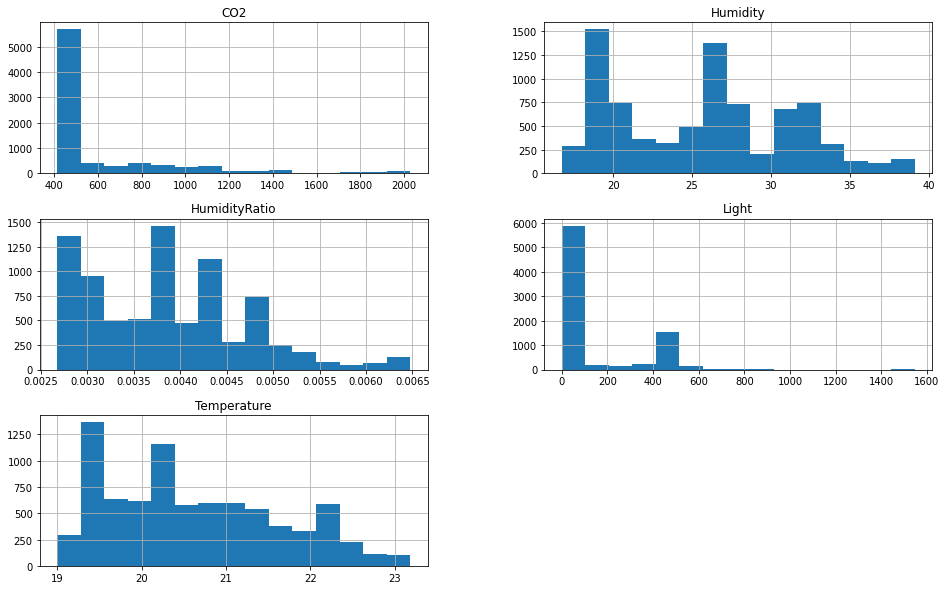

In [ ]:
# Histograms
trainX.hist(figsize=(16, 10), bins=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

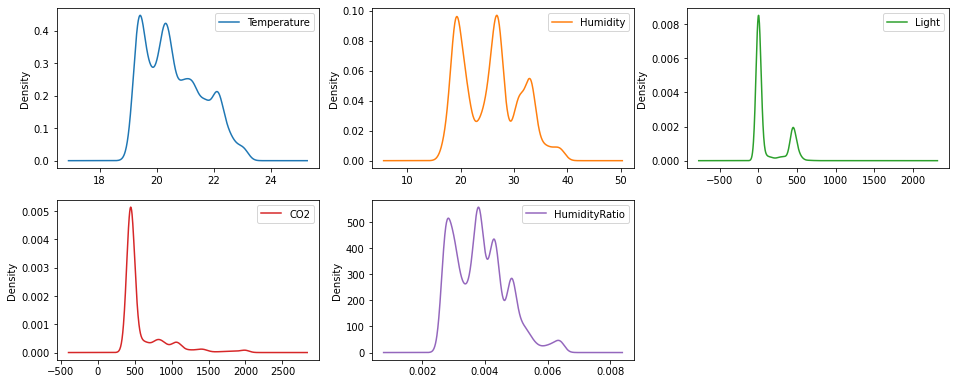

In [ ]:
# Density Plot
x = trainX.copy()
x = x.drop(columns=['Day', 'Time'])
x.plot(kind='density', subplots=True, figsize=(16, 10), layout=(3,3), sharex=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

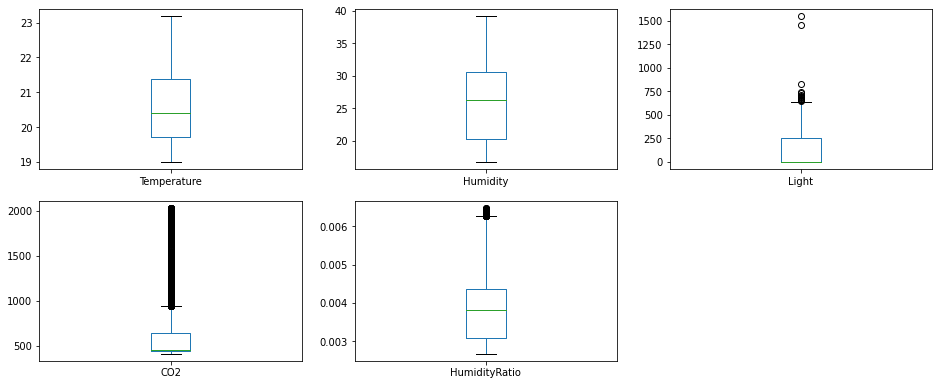

In [ ]:
# Box Plots
x = trainX.copy()
x = x.drop(columns=['Day', 'Time'])
x.plot(kind='box', subplots=True, figsize=(16, 10), layout=(3,3), sharex=False, sharey=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff06e68f2b0>,
      dtype=object)

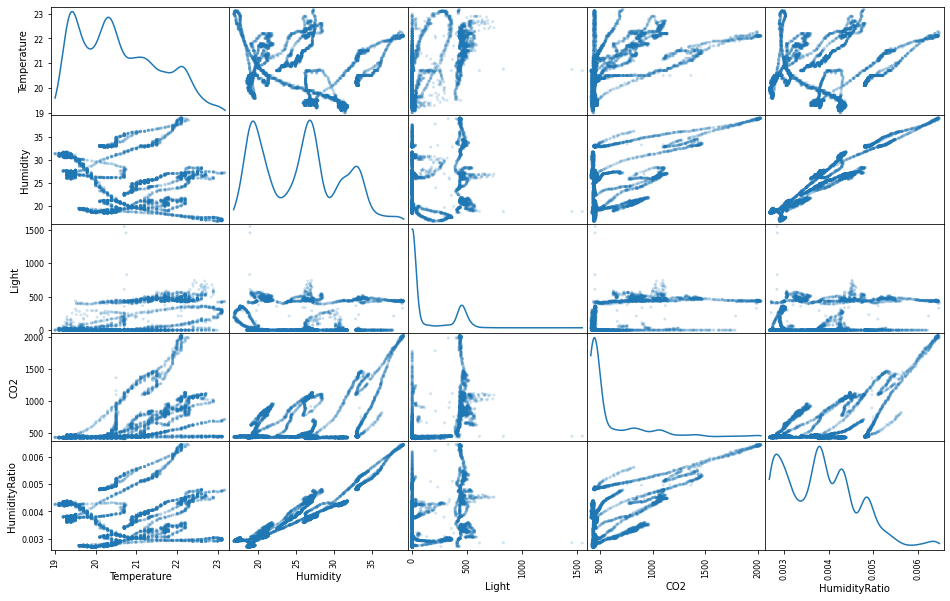

In [ ]:
# Scatter Matrix
from pandas.plotting import scatter_matrix
x = trainX.copy()
x = x.drop(columns=['Day', 'Time'])
scatter_matrix(x, alpha=0.2, figsize=(16, 10), diagonal='kde') # kde = Kernel Density Estimation 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

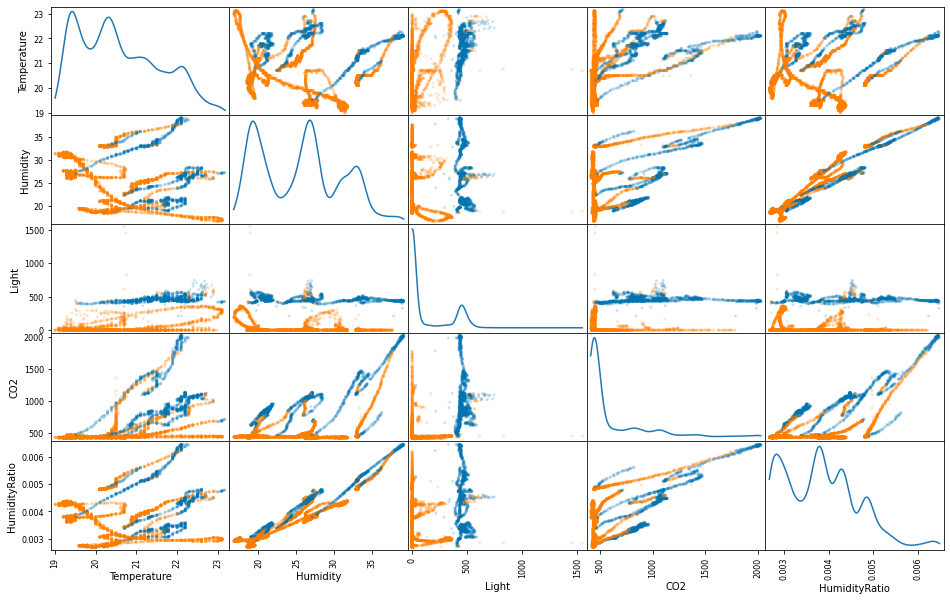

In [ ]:
# Scatter Matrix (colorato sul valore Occupancy)
colors=['#ff8000','#0074b3']
scatter_matrix(x, alpha=0.2, figsize=(16, 10), diagonal='kde',marker='.',c=tr.Occupancy.apply(lambda x:colors[x]))
labels=["Yes", "No"]

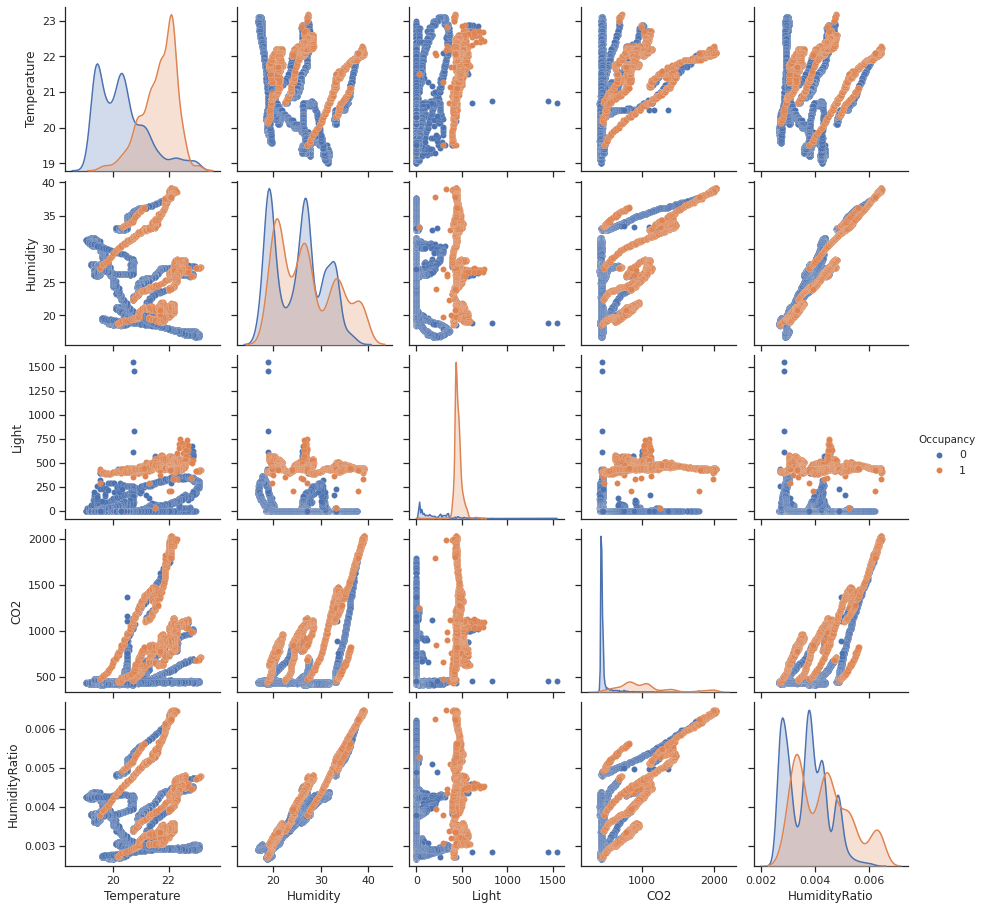

In [ ]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(tr, hue="Occupancy", plot_kws=dict(edgecolor='w', linewidth=0.1))

## Assessing data quality (missing values, outliers) 

In [ ]:
tr.dtypes

Day               object
Time              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [ ]:
trainX.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863
std,1.016916,5.531211,194.755805,314.320877,0.000852
min,19.000000,16.745000,0.000000,412.750000,0.002674
25%,19.700000,20.200000,0.000000,439.000000,0.003078
50%,20.390000,26.222500,0.000000,453.500000,0.003801
75%,21.390000,30.533333,256.375000,638.833333,0.004352
max,23.180000,39.117500,1546.333333,2028.500000,0.006476


In [ ]:
#Outliers Detection
def find_outliers(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

# Printing Outliers found
indices, values = find_outliers(trainX['Temperature'])
print("Outliers for Temperature")
v = np.sort(values)
print(v)
print(v.size)

indices, values = find_outliers(trainX['Humidity'])
print("Outliers for Humidity")
v = np.sort(values)
print(v)
print(v.size)

indices, values = find_outliers(trainX['Light'])
print("Outliers for Light")
v = np.sort(values)
print(v)
print(v.size)

indices, values = find_outliers(trainX['CO2'])
print("Outliers for CO2")
v = np.sort(values)
print(v)
print(v.size)

indices, values = find_outliers(trainX['HumidityRatio'])
print("Outliers for HumidityRatio")
v = np.sort(values)
print(v)
print(v.size)

Outliers for Temperature
[]
0
Outliers for Humidity
[]
0
Outliers for Light
[ 647.66666667  657.25        660.          661.33333333  665.5
  676.          686.25        688.5         696.5         708.75
  732.75        744.          829.         1451.75       1546.33333333]
15
Outliers for CO2
[ 939.375  940.75   942.    ... 2028.    2028.25  2028.5  ]
1063
Outliers for HumidityRatio
[0.00626521 0.00626898 0.00627602 0.00628002 0.00628063 0.00628438
 0.00628438 0.00628438 0.00628803 0.00628896 0.00629217 0.00629355
 0.00629673 0.00629714 0.00630271 0.00630818 0.00630874 0.00631396
 0.00631584 0.00631771 0.00631771 0.00631771 0.00632365 0.00632489
 0.00632489 0.00632862 0.00633203 0.00633317 0.00633605 0.00633773
 0.00635269 0.00635415 0.00635662 0.00635976 0.00636476 0.0063723
 0.00637314 0.00637322 0.00637517 0.00637517 0.00637764 0.00638076
 0.00638355 0.00638372 0.00638439 0.00638606 0.00638793 0.00638981
 0.00639106 0.00639356 0.00639356 0.00639606 0.00639731 0.00640106
 0.006401

## Variables transformations 

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
x = trainX.copy()
x = x.drop(columns=['Day', 'Time'])

scaler = RobustScaler()
#scaler = MinMaxScaler() 
scaledX = scaler.fit_transform(x)
print(x)
print(scaledX)

      Temperature  Humidity  Light         CO2  HumidityRatio
0           23.18   27.2720  426.0  721.250000       0.004793
1           23.15   27.2675  429.5  714.000000       0.004783
2           23.15   27.2450  426.0  713.500000       0.004779
3           23.15   27.2000  426.0  708.250000       0.004772
4           23.10   27.2000  426.0  704.500000       0.004757
...           ...       ...    ...         ...            ...
8138        21.05   36.0975  433.0  787.250000       0.005579
8139        21.05   35.9950  433.0  789.500000       0.005563
8140        21.10   36.0950  433.0  798.500000       0.005596
8141        21.10   36.2600  433.0  820.333333       0.005621
8142        21.10   36.2000  447.0  821.000000       0.005612

[8143 rows x 5 columns]
[[1.65088757 0.10156452 1.66162847 1.33986656 0.77903789]
 [1.63313609 0.10112903 1.67528035 1.30358632 0.77154191]
 [1.63313609 0.09895161 1.66162847 1.30108424 0.76841904]
 ...
 [0.42011834 0.95540323 1.68893223 1.7264387  1.4092

## Pairwise correlations and eventual elimination of redundant variables 

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1,-0.141759,0.649942,0.559894,0.151762,0.53822
Humidity,-0.141759,1,0.0378279,0.439023,0.955198,0.132964
Light,0.649942,0.0378279,1,0.664022,0.23042,0.907352
CO2,0.559894,0.439023,0.664022,1,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.23042,0.626556,1,0.300282
Occupancy,0.53822,0.132964,0.907352,0.712235,0.300282,1


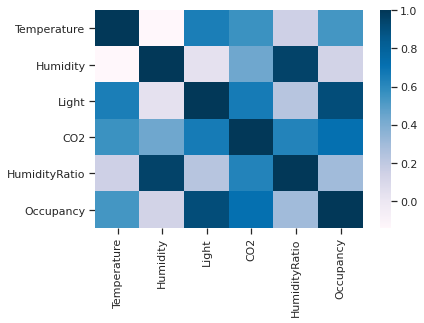

In [ ]:
import seaborn as sns
corr = tr[tr.columns[1:]].corr(method='pearson')

cm = sns.light_palette("green", as_cmap=True)
s = corr.style.background_gradient(cmap="PuBu") # cmap="coolwarm"
s
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='PuBu')
s

# Clustering

**K-Means**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Calcolo SSE con k da 2 a 50

sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(scaledX)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

In [ ]:
# Inserisco K ed SSE in un DataFrame per fare il grafico con seaborn

k = list(range(2, len(sse_list)+2))
df = pd.DataFrame(list(zip(k, sse_list)), 
               columns =['K', 'SSE']) 

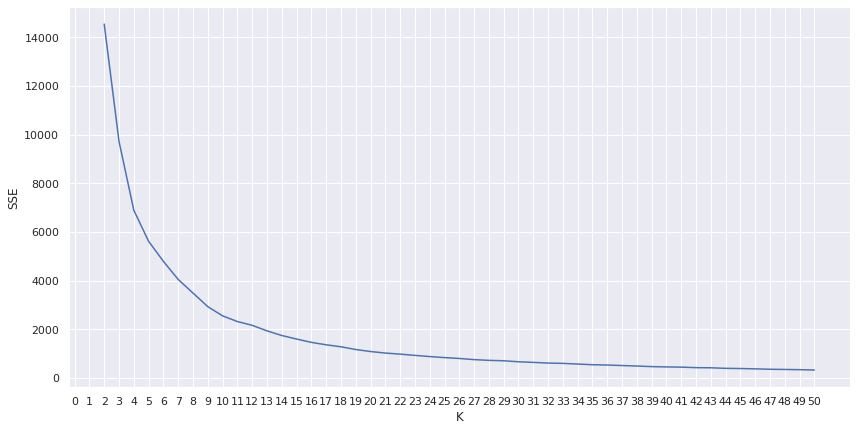

In [ ]:
# Grafico SSE

sns.set(rc={'figure.figsize':(14,7)})
ax = sns.lineplot(x="K", y="SSE", data=df)
ax.set_xticks(range(0,len(sse_list)+2,1))

In [ ]:
sil_list = list()
max_k = 50
for k in range(2, max_k + 1):
    clusterer = KMeans(n_clusters=k, n_init=10, max_iter=100)
    cluster_labels = clusterer.fit_predict(scaledX)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaledX, cluster_labels)
    sil_list.append(silhouette_avg)

In [ ]:
k_sil = list(range(2, len(sil_list)+2))
df_sil = pd.DataFrame(list(zip(k_sil, sil_list)), 
               columns =['K', 'Silhouette']) 

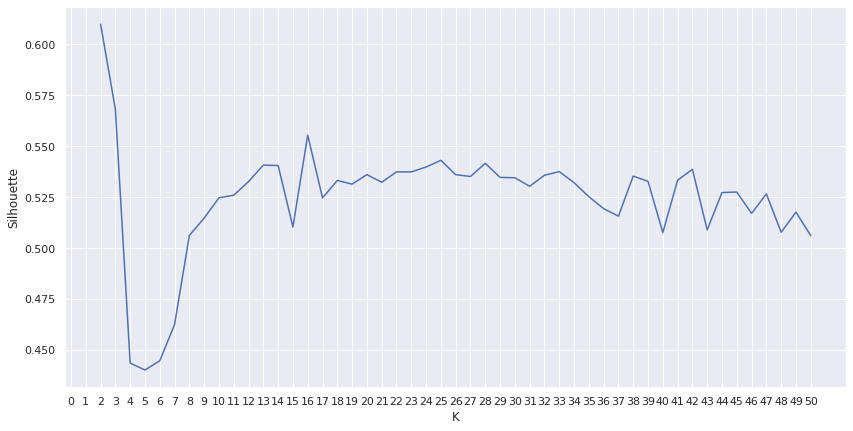

In [ ]:
sns.set(rc={'figure.figsize':(14,7)})
ax = sns.lineplot(x="K", y="Silhouette", data=df_sil)
ax.set_xticks(range(0,len(sil_list)+2,1))

In [ ]:
# Provo con k = 10

kmeans = KMeans(n_clusters=10, random_state=0).fit(scaledX)

In [ ]:
# Creo una nuova colonna con il numero di cluster per ogni riga
x['Cluster'] = kmeans.labels_

In [ ]:
#Analisi clusters composizione
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
sizes = dict(zip(bins, hist))

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(x)))

Cluster 0: 973 (0.12)
Cluster 1: 732 (0.09)
Cluster 2: 251 (0.03)
Cluster 3: 1929 (0.24)
Cluster 4: 2161 (0.27)
Cluster 5: 426 (0.05)
Cluster 6: 201 (0.02)
Cluster 7: 181 (0.02)
Cluster 8: 536 (0.07)
Cluster 9: 753 (0.09)


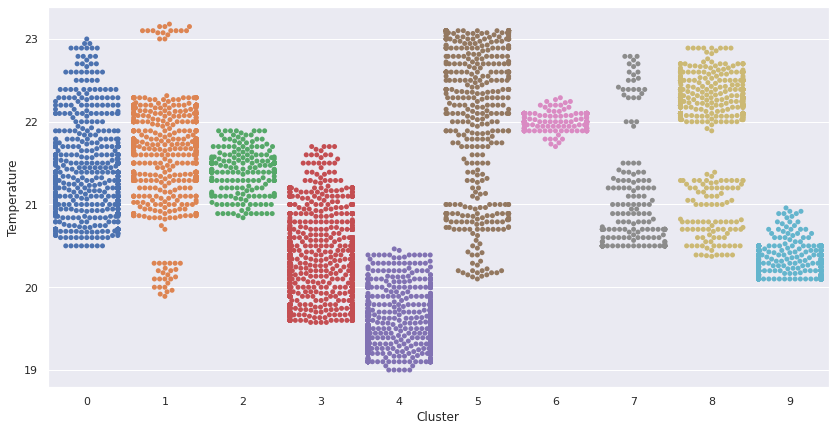

In [ ]:
# Plot su Temperature

sns.swarmplot(x.Cluster,x.Temperature)

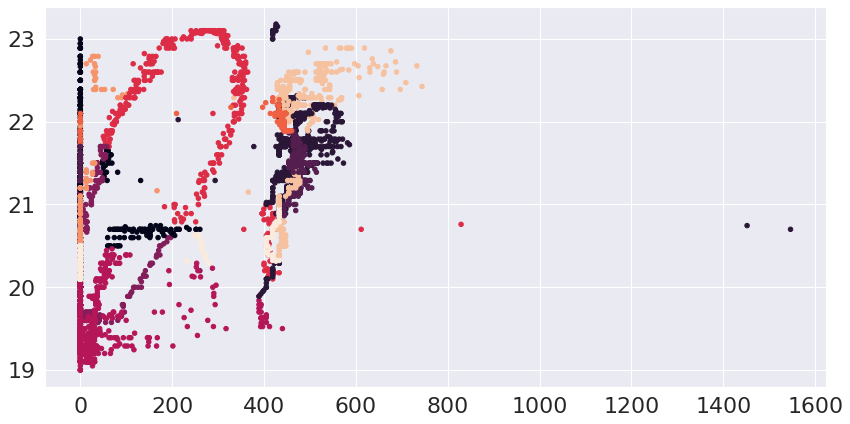

In [ ]:
#Clusters su 2 dimensioni
plt.scatter(x['Light'], x['Temperature'], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

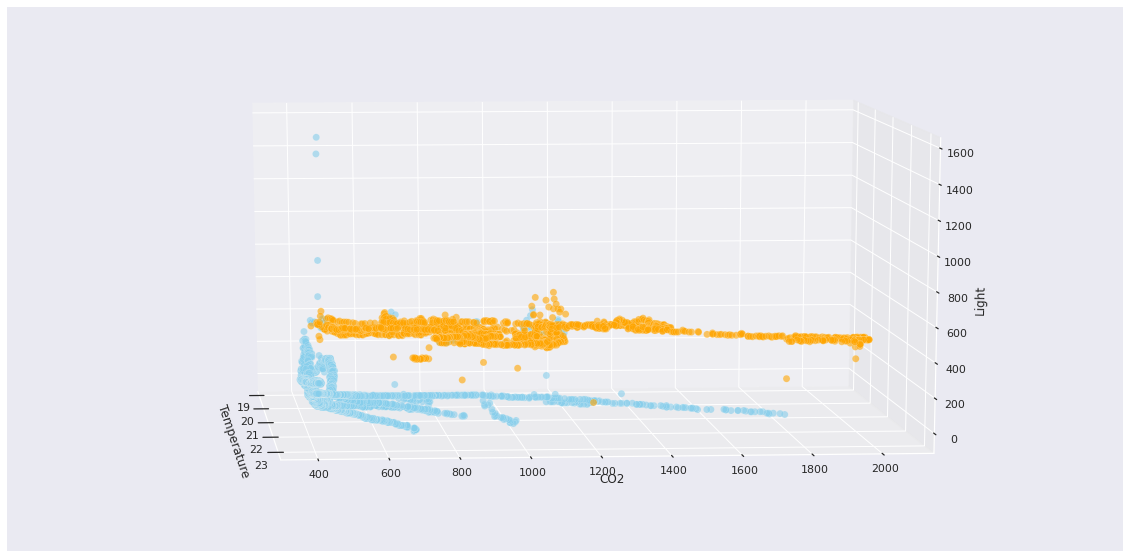

In [ ]:
# 3D plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tr[tr['Occupancy']==1]['Temperature'],tr[tr['Occupancy']==1]['CO2'],tr[tr['Occupancy']==1]['Light'], color='orange',alpha=0.6, s=50, edgecolors='w', linewidth=0.2)
ax.scatter(tr[tr['Occupancy']==0]['Temperature'],tr[tr['Occupancy']==0]['CO2'],tr[tr['Occupancy']==0]['Light'], color='skyblue',alpha=0.6, s=50, edgecolors='w', linewidth=0.2)
ax.view_init(10, 355)
plt.xlabel('Temperature')
plt.ylabel('CO2')
ax.set_zlabel('Light')
plt.show()

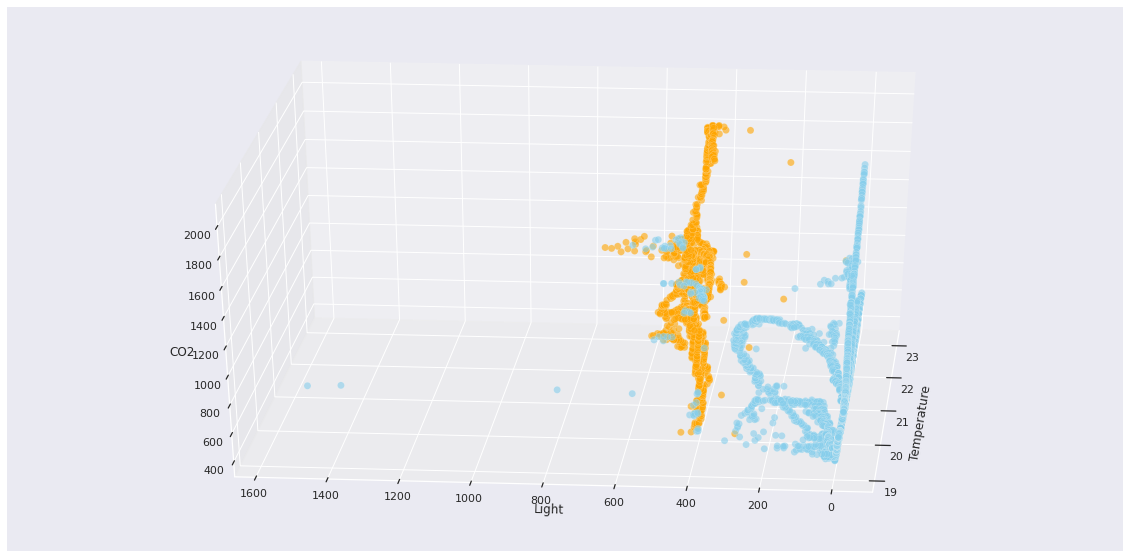

In [ ]:
 
# plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tr[tr['Occupancy']==1]['Temperature'],tr[tr['Occupancy']==1]['Light'],tr[tr['Occupancy']==1]['CO2'], color='orange',alpha=0.6, s=50, edgecolors='w', linewidth=0.2)
ax.scatter(tr[tr['Occupancy']==0]['Temperature'],tr[tr['Occupancy']==0]['Light'],tr[tr['Occupancy']==0]['CO2'], color='skyblue',alpha=0.6, s=50, edgecolors='w', linewidth=0.2)
ax.view_init(30, 185)
plt.xlabel('Temperature')
plt.ylabel('Light')
ax.set_zlabel('CO2')
plt.show()

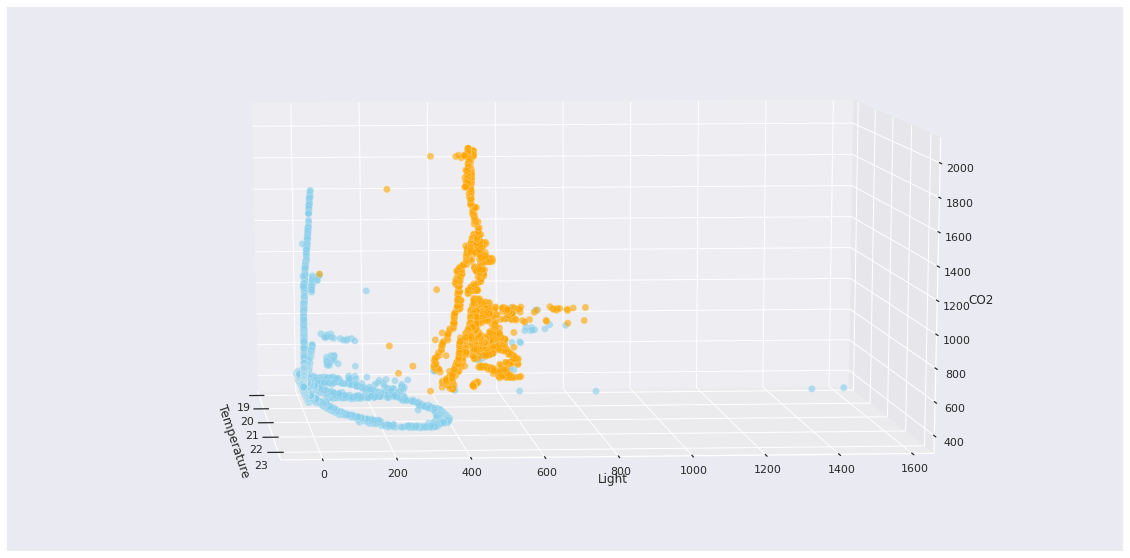

In [ ]:
# plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tr[tr['Occupancy']==1]['Temperature'],tr[tr['Occupancy']==1]['Light'],tr[tr['Occupancy']==1]['CO2'], color='orange',alpha=0.6, s=50, edgecolors='w', linewidth=0.2)
ax.scatter(tr[tr['Occupancy']==0]['Temperature'],tr[tr['Occupancy']==0]['Light'],tr[tr['Occupancy']==0]['CO2'], color='skyblue',alpha=0.6, s=50, edgecolors='w', linewidth=0.2)
ax.view_init(10, 355)
plt.xlabel('Temperature')
plt.ylabel('Light')
ax.set_zlabel('CO2')
plt.show()

In [ ]:
# Elimino Humidity e HumidityRatio dai centroidi
temp_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(temp_centers)
print(type(temp_centers))
c2 = []
for i in temp_centers:
  a = [i[0], i[2], i[3]]
  c2.append(a)
print()
c2 = np.asarray(c2, dtype=np.float32)
print(c2)
print(type(c2))

[[2.12824547e+01 2.49692820e+01 1.35148357e+01 5.05153491e+02
  3.90842982e-03]
 [2.16545763e+01 2.19364704e+01 4.70694308e+02 7.94078928e+02
  3.50787842e-03]
 [2.14069688e+01 3.41388579e+01 4.11865206e+02 1.38155259e+03
  5.39405471e-03]
 [2.02895297e+01 1.97007018e+01 4.72922931e+00 4.49323717e+02
  2.89466744e-03]
 [1.94758309e+01 2.83993023e+01 1.33874132e+01 4.43853116e+02
  3.97012243e-03]
 [2.20523091e+01 1.82062077e+01 2.76914085e+02 4.63661502e+02
  2.97369943e-03]
 [2.20326700e+01 3.81990767e+01 3.94461857e+02 1.88124129e+03
  6.27719413e-03]
 [2.10365378e+01 3.34006215e+01 9.38075506e+00 1.03281805e+03
  5.13857343e-03]
 [2.20408256e+01 2.77673147e+01 4.71899502e+02 1.04075306e+03
  4.54357385e-03]
 [2.03160489e+01 3.30439301e+01 2.95415559e+01 4.95619736e+02
  4.87594294e-03]]
<class 'numpy.ndarray'>

[[  21.282455    13.514835   505.1535   ]
 [  21.654575   470.6943     794.0789   ]
 [  21.40697    411.8652    1381.5526   ]
 [  20.28953      4.7292295  449.32373  ]
 [  19

In [ ]:
# Trasposizione della matrice dei centroidi
centers = list(map(list, zip(*c2)))
centers = np.asarray(centers, dtype=np.float32)
print(centers)

[[  21.282455    21.654575    21.40697     20.28953     19.47583
    22.052309    22.03267     21.036537    22.040825    20.31605  ]
 [  13.514835   470.6943     411.8652       4.7292295   13.387413
   276.9141     394.46185      9.380755   471.8995      29.541555 ]
 [ 505.1535     794.0789    1381.5526     449.32373    443.85312
   463.6615    1881.2413    1032.818     1040.753      495.61975  ]]


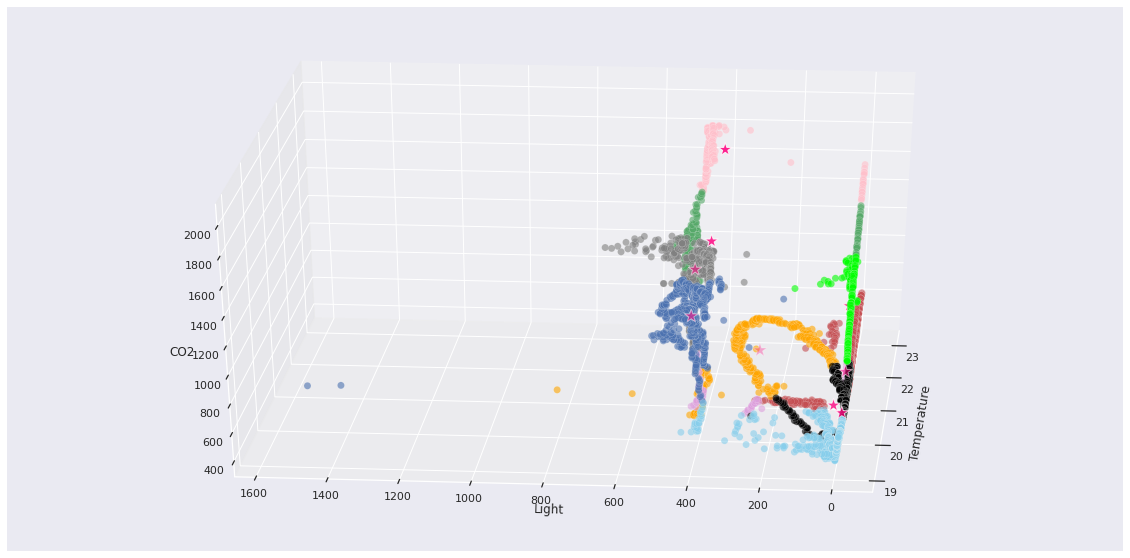

In [ ]:
# plot
fig = plt.figure(figsize=(20,10))
temp = x

ax = fig.add_subplot(111, projection='3d')
ax.scatter(c2[:,0], c2[:,1], c2[:,2], s=200,marker="*", c='#FF0080', edgecolors="w")
ax.scatter(temp[temp['Cluster']==0]['Temperature'],temp[temp['Cluster']==0]['Light'],temp[temp['Cluster']==0]['CO2'], color='r',alpha=0.6, s=50, edgecolors="w", linewidth=0.2, zorder=3)
ax.scatter(temp[temp['Cluster']==1]['Temperature'],temp[temp['Cluster']==1]['Light'],temp[temp['Cluster']==1]['CO2'], color='b',alpha=0.6, s=50, edgecolors='w', linewidth=0.2, zorder=3)
ax.scatter(temp[temp['Cluster']==2]['Temperature'],temp[temp['Cluster']==2]['Light'],temp[temp['Cluster']==2]['CO2'], color='g',alpha=0.6, s=50, edgecolors='w', linewidth=0.2, zorder=3)
ax.scatter(temp[temp['Cluster']==3]['Temperature'],temp[temp['Cluster']==3]['Light'],temp[temp['Cluster']==3]['CO2'], color='black',alpha=0.6, s=50, edgecolors='w', linewidth=0.2, zorder = 3)
ax.scatter(temp[temp['Cluster']==4]['Temperature'],temp[temp['Cluster']==4]['Light'],temp[temp['Cluster']==4]['CO2'], color='skyblue',alpha=0.6, s=50, edgecolors='w', linewidth=0.2, zorder = 3)
ax.scatter(temp[temp['Cluster']==5]['Temperature'],temp[temp['Cluster']==5]['Light'],temp[temp['Cluster']==5]['CO2'], color='orange',alpha=0.6, s=50, edgecolors='w', linewidth=0.2, zorder = 3)
ax.scatter(temp[temp['Cluster']==6]['Temperature'],temp[temp['Cluster']==6]['Light'],temp[temp['Cluster']==6]['CO2'], color='pink',alpha=0.6, s=50, edgecolors='w', linewidth=0.2, zorder = 3)
ax.scatter(temp[temp['Cluster']==7]['Temperature'],temp[temp['Cluster']==7]['Light'],temp[temp['Cluster']==7]['CO2'], color='lime',alpha=0.6, s=50, edgecolors='w', linewidth=0.2, zorder = 3)
ax.scatter(temp[temp['Cluster']==8]['Temperature'],temp[temp['Cluster']==8]['Light'],temp[temp['Cluster']==8]['CO2'], color='gray',alpha=0.6, s=50, edgecolors='w', linewidth=0.2, zorder = 3)
ax.scatter(temp[temp['Cluster']==9]['Temperature'],temp[temp['Cluster']==9]['Light'],temp[temp['Cluster']==9]['CO2'], color='plum',alpha=0.6, s=50, edgecolors='w', linewidth=0.2, zorder = 3)
ax.view_init(30, 185)
plt.xlabel('Temperature')
plt.ylabel('Light')
ax.set_zlabel('CO2')
plt.show()

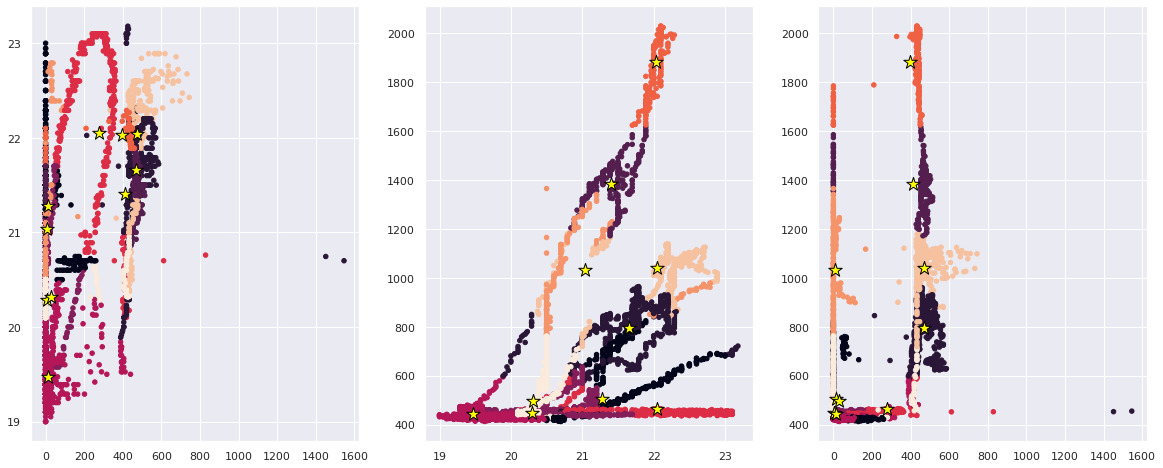

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
ax1.scatter(x['Light'], x['Temperature'], c=kmeans.labels_, s=20)
ax1.scatter(c2[:,1], c2[:,0], s=200,marker="*", c='yellow', edgecolors="black")

ax2.scatter(x['Temperature'], x['CO2'], c=kmeans.labels_, s=20)
ax2.scatter(c2[:,0], c2[:,2], s=200,marker="*", c='yellow', edgecolors="black")

ax3.scatter(x['Light'], x['CO2'], c=kmeans.labels_, s=20)
ax3.scatter(c2[:,1], c2[:,2], s=200,marker="*", c='yellow', edgecolors="black")

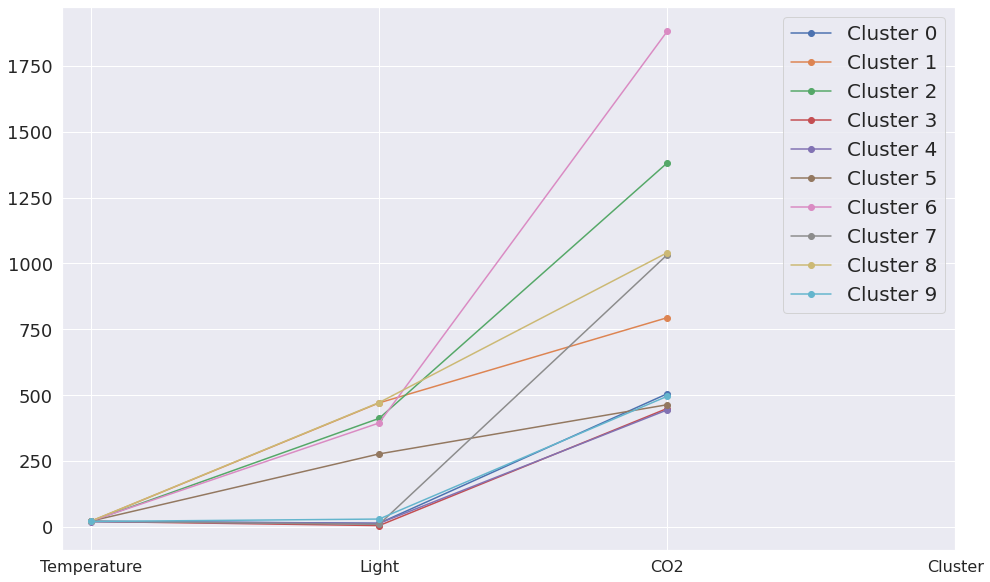

In [ ]:
# Parallel coordinates

df = x.drop(columns= ["Humidity", "HumidityRatio"])

plt.figure(figsize=(16, 10))
for i in range(0, len(c2)):
    plt.plot(c2[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=16)
plt.legend(fontsize=20)
plt.show()

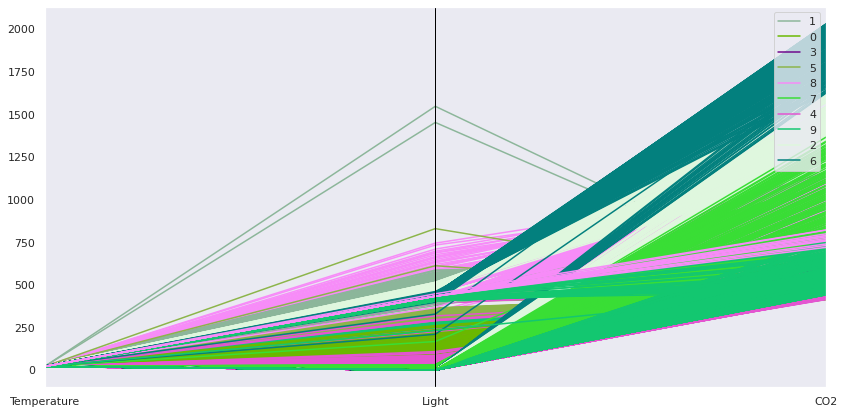

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

parallel_coordinates(x, class_column='Cluster', cols=['Temperature', 'Light', 'CO2'])
plt.show()

# Association Rules Mining

# Classification